In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("mtcars.csv")
df.head(2)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [8]:
# MEASURES OF CENTRAL TENDENCY

df['mpg'].mean() #returns mean of 'mpg' column

df['mpg'].median() #returns median of each column

df['mpg'].mode() #returns mode of 'mpg' column

0    10.4
1    15.2
2    19.2
3    21.0
4    21.4
5    22.8
6    30.4
Name: mpg, dtype: float64

In [10]:
# MEASURES OF SPREAD

df['mpg'].max() #returns max value of 'mgp' column

df['mpg'].min() #returns min value of 'mgp' column

range = df['mpg'].max() - df['mpg'].min()

df['mpg'].quantile(.75) #returns 3rd quantile of 'mpg' column
df['mpg'].quantile(.25) #returns 1st quantile of 'mpg' column
df['mpg'].quantile(.50) #returns 2nd quantile of 'mpg' column

IQR = df['mpg'].quantile(.75) - df['mpg'].quantile(.25) #inter quantile range 

# to remove outliers:
upper_limit = df['mpg'].quantile(.75) + 1.5*IQR
lower_limit = df['mpg'].quantile(.25) - 1.5*IQR
# any value that is outside this range will be considered as outlier and will be removed

df['mpg'].var() # returns the variance of the 'mpg' column
df['mpg'].std() #returns the standard deviation of the 'mpg' column


6.026948052089104

In [18]:
# HYPOTHESIS TESTING

from scipy import stats #for performing hypothesis tests
from bioinfokit.analys import get_data # to get data 
from bioinfokit.analys import stat #for performing hypothesis tests, same as 'stats' from 'scipy' library

In [15]:
# ONE SAMPLE Z-TEST : checks whether the sample comes from a knows population where population mean and standard deviation are known.
df = get_data('z_one_samp').data

**question** : 

- Factory produces balls of a diameter of 5 cm
- Std. deviation = **0.4**
- Quality officer wants to test whether the ball diameter is significantly different from 5 cm or not
- Null Hypothesis - Sample Mean = 5 cm |||| Alternate hypothesis - Sample Mean not equal to 5

In [20]:
res = stat()
res.ztest(df = df, x = 'sizes', mu = 5, x_std = 0.4, test_type = 1) #df -> gets dataframe, x-> column name, mu -> sample mean, test_type -> 1(sample Z-test)
print(res.summary)


One Sample Z-test 

------------------  ---------
Sample size         50
Mean                 5.01796
Z value              0.317465
p value (one-tail)   0.375446
p value (two-tail)   0.750891
Lower 95.0%          4.90709
Upper 95.0%          5.12883
------------------  ---------


*here we will be accepting the null hypothesis as the Z-value is less than the significant value(0.05)*

In [21]:
# TWO SAMPLE Z-TEST : 
df = get_data('z_two_samp').data
df.head(2)

,fact_A,fact_B
0,4.977904,5.887947
1,5.166254,5.990616


**question:**
Null hypothesis: Two group means are equal
Alternate hypothesis: Two group means are different (not equal)

#### Std. deviation of two population is fixed at 0.1

In [22]:
res = stat()
res.ztest(df = df, x = 'fact_A', y=  'fact_B', x_std = 0.1, y_std = 0.1, test_type = 2)

print(res.summary)


Two Sample Z-test 

------------------  ----------
Sample size for x    50
Sample size for y    50
Mean of x             5.01284
Mean of y             5.99015
Z value             -48.8656
p value (one-tail)    0
p value (two-tail)    0
Lower 95.0%          -1.01651
Upper 95.0%          -0.938113
------------------  ----------


- Reject the null hypothesis and can conclude that there is a significant difference in the ball size produced in factories A and B
- Factory A is closer to mean 5 however Factory B is not

In [23]:
# ONE SAMPLE T-TEST :

 - used for comparing the sample mean (a random sample from a population) with the specific value
 - In t-test, the population variance is unknown and it is estimated from sample variance
 - If n < 30, Z-test cant be applied

In [24]:
df = get_data('t_one_samp').data
df.head(2)

,size
0,5.739987
1,5.254042


**question:**
- Null Hypothesis: Sample mean is equal to the hypothesized or known population mean 
- Alternate Hypothesis: Sample mean is not equal to the hypothesized or known population mean

In [26]:
res = stat()
res.ttest(df = df, test_type = 1, res = 'size', mu = 5)

print(res.summary)


One Sample t-test 

------------------  --------
Sample size         50
Mean                 5.05128
t                    0.36789
Df                  49
p value (one-tail)   0.35727
p value (two-tail)   0.71454
Lower 95.0%          4.77116
Upper 95.0%          5.3314
------------------  --------


since the 't' value is non significant, we accept the null hypothesis

In [27]:
# TWO SAMPLE T-TEST : compares the means of two independent groups, determining wether they are equal or significantly different.

df = get_data('t_ind_samp').data
df.head(2)

,Genotype,yield
0,A,78.0
1,A,84.3


In [28]:
res = stat()
res.ttest(df = df, xfac = 'Genotype', res = 'yield', test_type = 2)

print(res.summary)


Two sample t-test with equal variance

------------------  -------------
Mean diff           -10.3
t                    -5.40709
Std Error             1.90491
df                   10
p value (one-tail)    0.000149204
p value (two-tail)    0.000298408
Lower 95.0%         -14.5444
Upper 95.0%          -6.05561
------------------  -------------

Parameter estimates

Level      Number    Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  ------  ---------  -----------  -------------  -------------
A               6    79.1    3.30817      1.35056        75.6283        82.5717
B               6    89.4    3.29059      1.34338        85.9467        92.8533



- statistically significant and hence reject the null hypothesis

In [30]:
# ANNOVA : 
data = {
    'A': [25, 30, 28, 36, 29],
    'B': [45, 55, 29, 56, 40],
    'C': [30, 29, 33, 37, 27],
    'D': [54, 60, 51, 62, 73]
}

df = pd.DataFrame(data)
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


#### Null hypothesis: Groups means are equal (no variation in means of groups)

`H0: μ1=μ2=…=μp`

#### Alternative hypothesis: At least, one group mean is different from other groups
`H1: All μ are not equal`

In [31]:
# there are 4 columns which are groups for the ANNOVA analysis.

df_melt = pd.melt(df.reset_index(), id_vars = ['index'], value_vars = ['A', 'B', 'C', 'D'])
df_melt

,index,variable,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [33]:
df_melt.columns = ['index', 'treatments', 'value']
res = stat()
res.anova_stat(df = df_melt, res_var = 'value', anova_model = 'value~C(treatments)')

print(res.anova_summary)


                 df   sum_sq   mean_sq         F    PR(>F)
C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
Residual       16.0   918.00    57.375       NaN       NaN


- higher F value which means greater than F critical value indicates statistically significant in groups


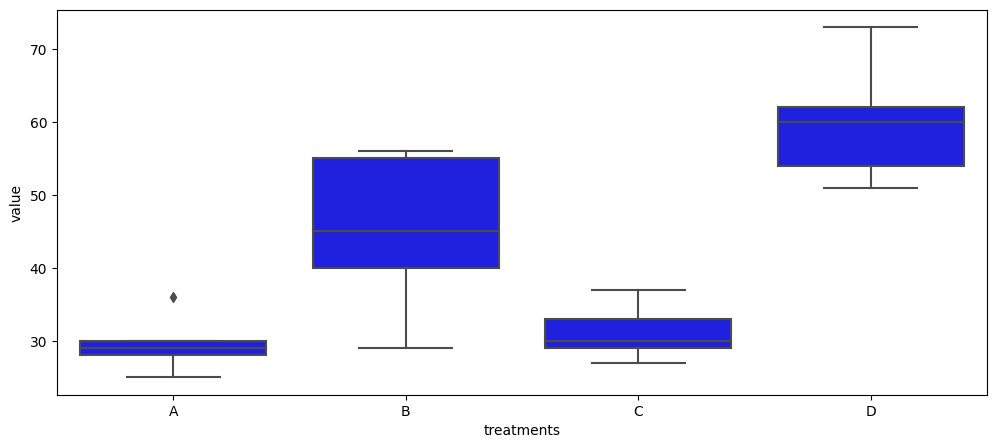

In [34]:
plt.subplots(figsize=(12,5))
sns.boxplot(x='treatments', y='value', data=df_melt, color='blue')
plt.show()

In [35]:
# CHI-SQUARE TEST:
# test for independence.

df = get_data('drugdata').data
df.head(2)

,treatments,cured,noncured
0,treated,60,10
1,nontreated,30,25


- Test for independence
- Null Hypothesis: there is no association between the two categorical variables
- Alternate Hypothesis: there is an association between the two categorical variables

In [36]:
df = df.set_index('treatments') # setting 'treatments' column as the index.

df

,cured,noncured
treatments,,
treated,60,10
nontreated,30,25


In [37]:
res = stat()
res.chisq(df = df)

print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       13.3365  0.000260291
Log-likelihood     1       13.4687  0.000242574



-  statistically significant basically which means that there is some degree of association between the treatments (treated & nontreated) with treatment outcome (cured and noncured)
